In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from tqdm import tqdm
from mimicry_ravi import update
from IPython.display import HTML

In [64]:
# Initialize population parameters
num_predators = 100
num_venomous_prey = 100
num_mimics = 100
d = 2

mutation_rate = 0.01

In [65]:
predators_detectors_initial_mean = np.array([1 / np.sqrt(2), 1 / np.sqrt(2)])
predators_detectors_initial_cov = 0.4**2 * np.eye(d)

venomous_signals_initial_mean = np.array([1, 0])
venomous_signals_initial_cov = 0.4**2 * np.eye(d)

mimic_signals_initial_mean = np.array([0, 1])
mimic_signals_initial_cov = 0.4**2 * np.eye(d)

Text(0.5, 1.0, 'Initial distributions ($d=2$)')

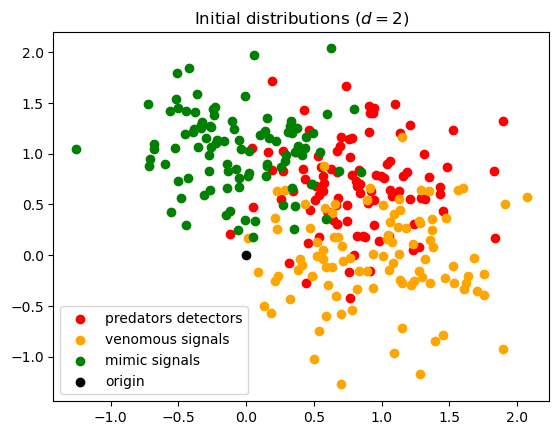

In [66]:
detectors =         np.random.multivariate_normal(mean=predators_detectors_initial_mean,
                                                  cov=predators_detectors_initial_cov,
                                                  size=num_predators)
venomous_signals =  np.random.multivariate_normal(mean=venomous_signals_initial_mean,
                                                  cov=venomous_signals_initial_cov,
                                                  size=num_venomous_prey)
mimic_signals =     np.random.multivariate_normal(mean=mimic_signals_initial_mean,
                                                  cov=mimic_signals_initial_cov,
                                                  size=num_mimics)
signals = np.vstack((venomous_signals, mimic_signals))

risk_tols = np.random.exponential(scale=1., size=num_predators)
venom_levels = np.concatenate((np.random.uniform(0., 1., size=num_venomous_prey), np.zeros(num_mimics)))

plt.scatter(detectors[:, 0], detectors[:, 1], color='red', label='predators detectors')
plt.scatter(signals[:num_venomous_prey, 0], signals[:num_venomous_prey, 1], color='orange', label='venomous signals')
plt.scatter(signals[num_venomous_prey:, 0], signals[num_venomous_prey:, 1], color='green', label='mimic signals')
plt.scatter(0, 0, color='k', label='origin')
plt.legend()
plt.title('Initial distributions ($d=2$)')

In [67]:
# plt.imshow(predation_matrix)
# plt.colorbar()

In [75]:
num_generations = 300
detectors_history    = np.zeros((num_generations, num_predators, d))
signals_history      = np.zeros((num_generations, num_venomous_prey+num_mimics, d))
risk_tols_history    = np.zeros((num_generations, num_predators))
venom_levels_history = np.zeros((num_generations, num_venomous_prey+num_mimics))

detectors_history[0] = detectors
signals_history[0] = signals
risk_tols_history[0] = risk_tols
venom_levels_history[0] = venom_levels

for t in tqdm(range(num_generations-1)):
    detectors_history[t+1], signals_history[t+1], risk_tols_history[t+1], venom_levels_history[t+1] = update(detectors_history[t], signals_history[t], risk_tols_history[t], venom_levels_history[t], num_venomous_prey, mutation_rate=mutation_rate, phenotype_type='vector')


100%|██████████| 299/299 [00:00<00:00, 2192.77it/s]


In [76]:
steps_per_frame = 1
fig = plt.figure(figsize=(4,4))
ax = plt.axes(xlim=(-5, 5), ylim=(-5, 5))
def animate(i):
    # Remove old points
    for artist in ax.get_lines()+ax.collections:  
        artist.remove()

    t = i * steps_per_frame
    pts = []
    ax.scatter(detectors_history[t, :, 0], detectors_history[t, :, 1], color='red', label='predators detectors', s=0.2)
    ax.scatter(signals_history[t, :num_venomous_prey, 0], signals_history[t, :num_venomous_prey, 1], color='orange', label='venomous signals', s=0.2)
    ax.scatter(signals_history[t, num_venomous_prey:, 0], signals_history[t, num_venomous_prey:, 1], color='green', label='mimic signals', s=0.2)
    ax.scatter(0, 0, color='k', label='origin')

    # pts.append(pt1, pt2, pt3, pt4)

    return ax.collections

anim = animation.FuncAnimation(fig, animate, frames=num_generations//steps_per_frame, interval=50, blit=True)
plt.close()
anim.save('test.gif')
HTML(anim.to_jshtml())
    

MovieWriter ffmpeg unavailable; using Pillow instead.


  0%|          | 0/10 [00:00<?, ?it/s]

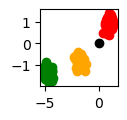

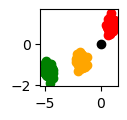

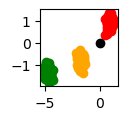

 30%|███       | 3/10 [00:00<00:00, 28.70it/s]

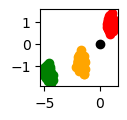

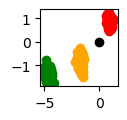

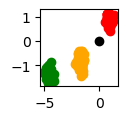

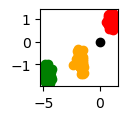

 70%|███████   | 7/10 [00:00<00:00, 32.14it/s]

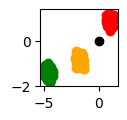

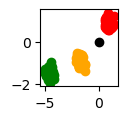

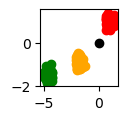

100%|██████████| 10/10 [00:00<00:00, 32.67it/s]


In [82]:
for t in tqdm(range(10)):
    detectors, signals, risk_tols, venom_levels = update(detectors, signals, risk_tols, venom_levels, num_venomous_prey, mutation_rate=mutation_rate, phenotype_type='vector')
    plt.figure(figsize=(1, 1))
    plt.scatter(detectors[:, 0], detectors[:, 1], color='red', label='predators detectors')
    plt.scatter(signals[:num_venomous_prey, 0], signals[:num_venomous_prey, 1], color='orange', label='venomous signals')
    plt.scatter(signals[num_venomous_prey:, 0], signals[num_venomous_prey:, 1], color='green', label='mimic signals')
    plt.scatter(0, 0, color='k', label='origin')
    # plt.legend()
    plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 3196.47it/s]


Text(0.5, 1.0, 'Final distributions ($d=2$)')

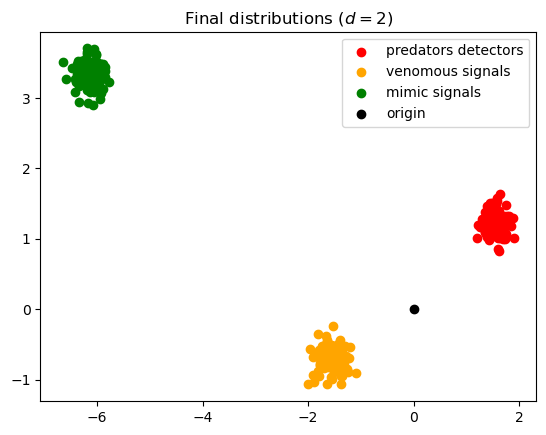

In [87]:
for t in tqdm(range(1000)):
    detectors, signals, risk_tols, venom_levels = update(detectors, signals, risk_tols, venom_levels, num_venomous_prey, mutation_rate=0.1, phenotype_type='vector')

plt.scatter(detectors[:, 0], detectors[:, 1], color='red', label='predators detectors')
plt.scatter(signals[:num_venomous_prey, 0], signals[:num_venomous_prey, 1], color='orange', label='venomous signals')
plt.scatter(signals[num_venomous_prey:, 0], signals[num_venomous_prey:, 1], color='green', label='mimic signals')
plt.scatter(0, 0, color='k', label='origin')
plt.legend()
plt.title('Final distributions ($d=2$)')